In [74]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import scipy.stats as sts

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


[9.84474557e-07 3.01306917e-02 6.82379961e-02 8.58668059e-06
 7.98928973e-04 3.90680235e-01 6.65478371e-04 4.29846900e-01
 6.37650455e-02 2.90938087e-01 5.17371494e-01 7.89511552e-01
 3.36913468e-03 3.22082187e-03 8.23348120e-01 6.49255193e-04
 7.75033073e-01 7.56947790e-01 1.06416303e-02 5.42166711e-12
 1.94972465e-01 7.91348068e-05 8.07970871e-03 2.44703819e-01
 1.00153479e+00 2.87088350e-01 2.70652560e-01 7.20045391e-03
 7.48333910e-02 5.71781549e-01 1.60188626e-09 6.12862770e-01
 8.89105040e-02 1.07504939e+00 4.38017601e-08 7.49684207e-01
 2.27623624e-02 7.28904738e-01 4.43470446e-06 8.19709761e-01
 2.38506422e-01 1.38938789e-01 3.12919264e-02 1.01106495e+00
 2.30090517e-03 1.05743770e-01 1.31342751e-02 1.34624208e-03
 4.29507560e-02 2.32099017e-03 7.61590497e-02 9.35938282e-01
 6.86893742e-01 3.56868277e-01 6.85294562e-01 6.01303937e-01
 8.84510761e-01 2.21509656e-05 9.99565359e-01 2.86868406e-02
 1.12446761e-01 1.07429397e+00 7.90146316e-01 3.29034385e-01
 2.35756874e-01 1.079209

TypeError: 'rv_frozen' object does not support indexing

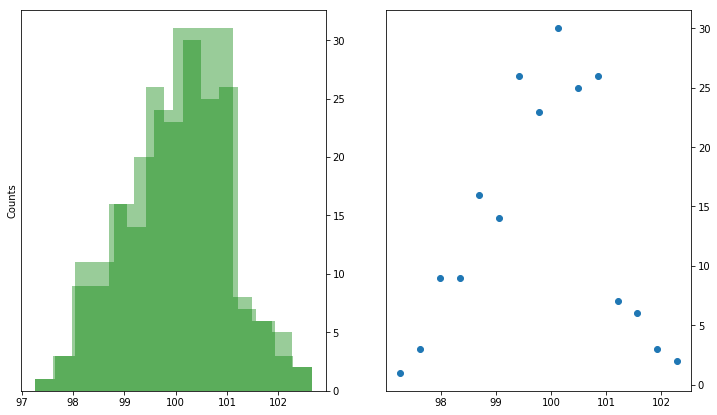

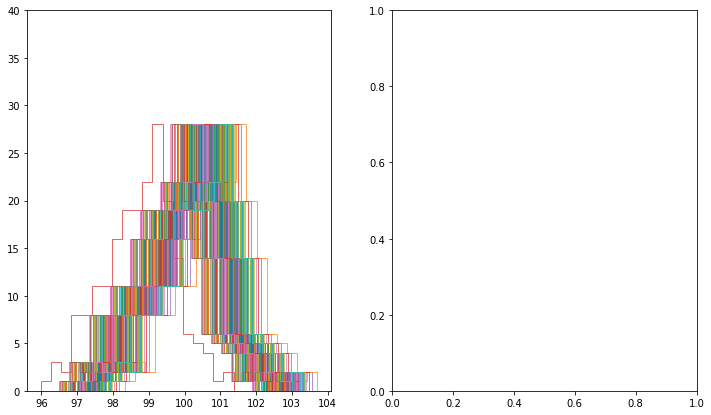

In [89]:
mu = 100
S = 1
N = 200

x = np.random.normal(mu, S, N)
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 7))
ax1.hist(x, bins=int(np.sqrt(N)), label = 'Gaussian distribution', alpha = 0.4, color = 'green')
ax1.set_ylabel('Counts')
ax1.yaxis.tick_right()
data = ax1.hist(x, bins=15, label = 'Gaussian distribution', alpha = 0.4, color = 'green')
ax2.errorbar(data[1][:-1], data[0], 1/np.sqrt(N), fmt = 'o')
ax2.yaxis.tick_right()

fig1, (ax3, ax4) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 7))
gauss = [x + t for t in np.random.normal(0, 1.06*S*N**(-1/5), N)]
ax3.set_ylim(0, 40)
for g in gauss:
   ax3.hist(g, bins=int(np.sqrt(N)+5), alpha = 0.7, histtype = 'step')

original_gauss = sts.norm(x, 1.06*S*N**(-1/5))
rng = np.arange(96, 105)
print(original_gauss.pdf(100))
ax4.plot(rng, original_gauss[0].pdf(rng))


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

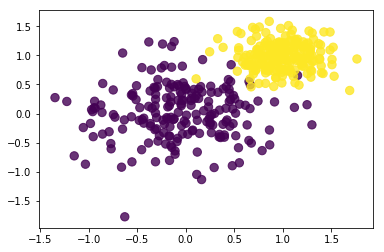

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot